# Estudo da utilização do Prophet em previsões de séries temporais

---
**Contatos:**

*   [LinkedIn](https://www.linkedin.com/in/leonardor99/)
*   [GitHub](https://github.com/ldemmz/)
*   [E-mail](mailto:leonardor99@outlook.com)
---


### Informações gerais

A biblioteca Prophet é uma ferramenta de previsão de séries temporais desenvolvida pelo Facebook. Ela é projetada para facilitar a previsão de séries temporais que possuem características específicas, como sazonalidade, tendências não lineares e feriados irregulares. Aqui está uma visão geral de como funciona:


*   **Modelagem de tendência:**

  Prophet modela as tendências como componentes flexíveis, permitindo que elas mudem ao longo do tempo. Isso é útil para capturar tendências não lineares que muitas vezes estão presentes em séries temporais do mundo real.

*   **Sazonalidade:**

 A biblioteca Prophet pode lidar com sazonalidade em diferentes escalas, como sazonalidade diária, semanal e anual. Isso é útil para prever padrões sazonais que ocorrem regularmente em dados de séries temporais.

*   **Feriados:**

  Feriados podem ter um impacto significativo nos padrões de dados de séries temporais. Prophet permite que você incorpore informações sobre feriados específicos em suas previsões, o que ajuda a capturar variações incomuns nos dados devido a feriados.

*   **Incerteza:**

  Prophet fornece intervalos de confiança para suas previsões, o que permite avaliar a incerteza associada a cada previsão. Isso é importante para entender a confiabilidade das previsões e tomar decisões informadas com base nelas.

*   **Flexibilidade:**

 Prophet foi projetado para ser fácil de usar e flexível o suficiente para lidar com uma variedade de dados de séries temporais. Ele oferece uma interface simples para ajustar modelos e realizar previsões com poucos parâmetros ajustáveis.







Para mais informações, acesse o link para a documentação:

 [-->> documentação prophet <<--](https://facebook.github.io/prophet/docs/quick_start.html)


### Exercício para praticar


In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from prophet import Prophet

In [2]:
# Utilizando yfinance para baixar dados dos últimos 4 anos de uma ação específica
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

Agora, dividiremos os dados com a proposta de utilizar uma parte para o treinamento do Prophet e, a segunda metade, para conferirmos posteriormente se a previsão foi de encontro com a realidade.

In [3]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [4]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [5]:
# Criação e treinamento do modelo
# Devido a natureza da ação, será considerado os feriados estadunidenses
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmorh03h/1rwkbu_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcmorh03h/uow86z59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89372', 'data', 'file=/tmp/tmpcmorh03h/1rwkbu_t.json', 'init=/tmp/tmpcmorh03h/uow86z59.json', 'output', 'file=/tmp/tmpcmorh03h/prophet_model4pnewfr5/prophet_model-20240404195703.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:57:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:57:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
# Criação de datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

O gráfico a seguir foi criado no matplotlib, fazendo um comparativo dos dados reais com a previsão feita pelo Prophet.

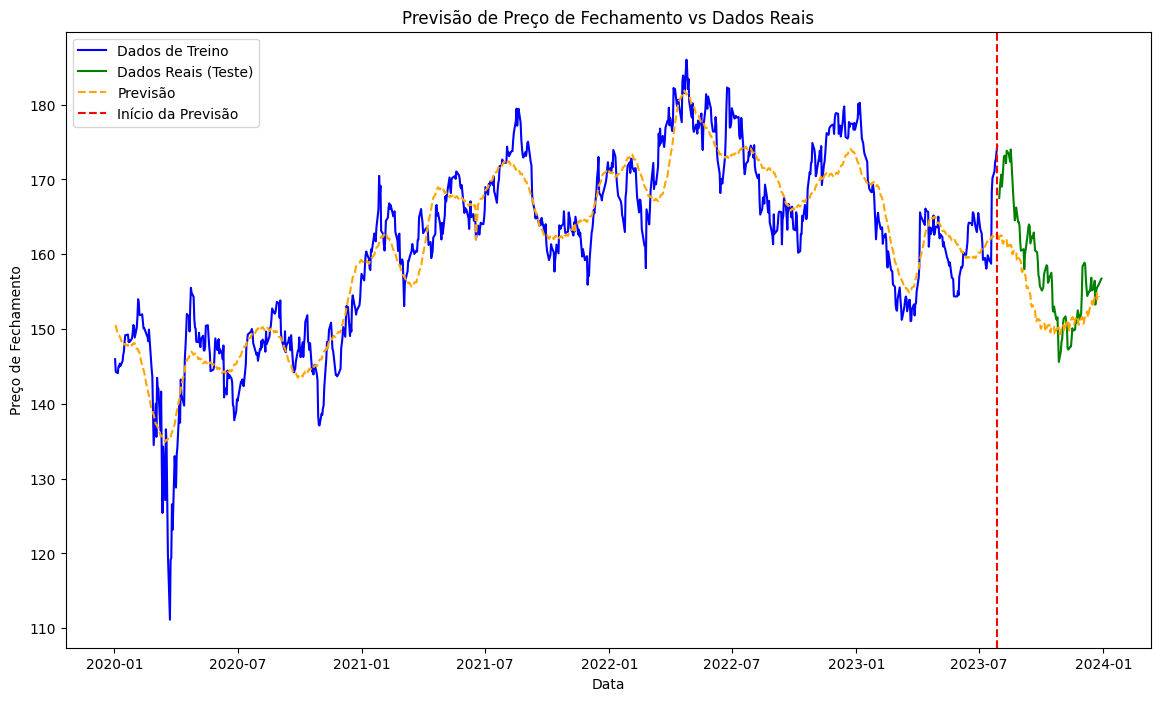

In [7]:
# Plotagem dos dados de treino, teste e previsões com matplolib
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

Como a figura anterior não é tão interativa, tomei a liberdade de criar uma nova figura com o plotly para acompanharmos melhor as divergências. Para isso, basta passar seu mouse pelo gráfico.

In [8]:
# Plotagem dos dados de treino, teste e previsões com plotly
fig = go.Figure()

# Dados de treino
fig.add_trace(go.Scatter(x=dados_treino['Date'], y=dados_treino['Close'], mode='lines', name='Dados de Treino', line=dict(color='#5E9BEC')))

# Dados reais (teste)
fig.add_trace(go.Scatter(x=dados_teste['Date'], y=dados_teste['Close'], mode='lines', name='Dados Reais (Teste)', line=dict(color='green')))

# Previsão
fig.add_trace(go.Scatter(x=previsao['ds'], y=previsao['yhat'], mode='lines', name='Previsão', line=dict(color='orange', dash='dash')))

# Linha vertical para marcar início da previsão
fig.add_shape(type="line",
    x0=dados_treino['Date'].max(), y0=min(dados_treino['Close']), x1=dados_treino['Date'].max(), y1=max(dados_treino['Close']),
    line=dict(color="#FF0000", width=3),
)

#Estilizando a figura
fig.update_layout(
    width=1400, height=600, # Se necessário, mude aqui as dimensões da figura para facilitar sua visualização
    template="plotly_dark",
    title='Previsão de Preço de Fechamento vs Dados Reais',
    titlefont=dict(size=22),
    title_x=0.5,
    xaxis=dict(
        title='Data',
        titlefont=dict(size=18)
    ),
    yaxis=dict(
        title='Preço de Fechamento',
        titlefont=dict(size=18),
        range=[min(dados_treino['Close']) - 15, max(dados_treino['Close']) + 15]
    ),
    legend=dict(
        x=1.02,
        y=0.1,
        bgcolor="#7F5353"
    )
)

fig.show()

###NOTA: Github incapaz de renderizar gráfico gerado com o Plotly

O Plotly é uma biblioteca de visualização de dados interativa que produz gráficos altamente interativos, geralmente em HTML. Esses gráficos requerem JavaScript para funcionar, o que não é suportado no ambiente estático do GitHub.

Como o GitHub renderiza apenas gráficos estáticos, como imagens PNG, JPEG ou SVG, o gráfico foi anexado abaixo em formato de imagem.

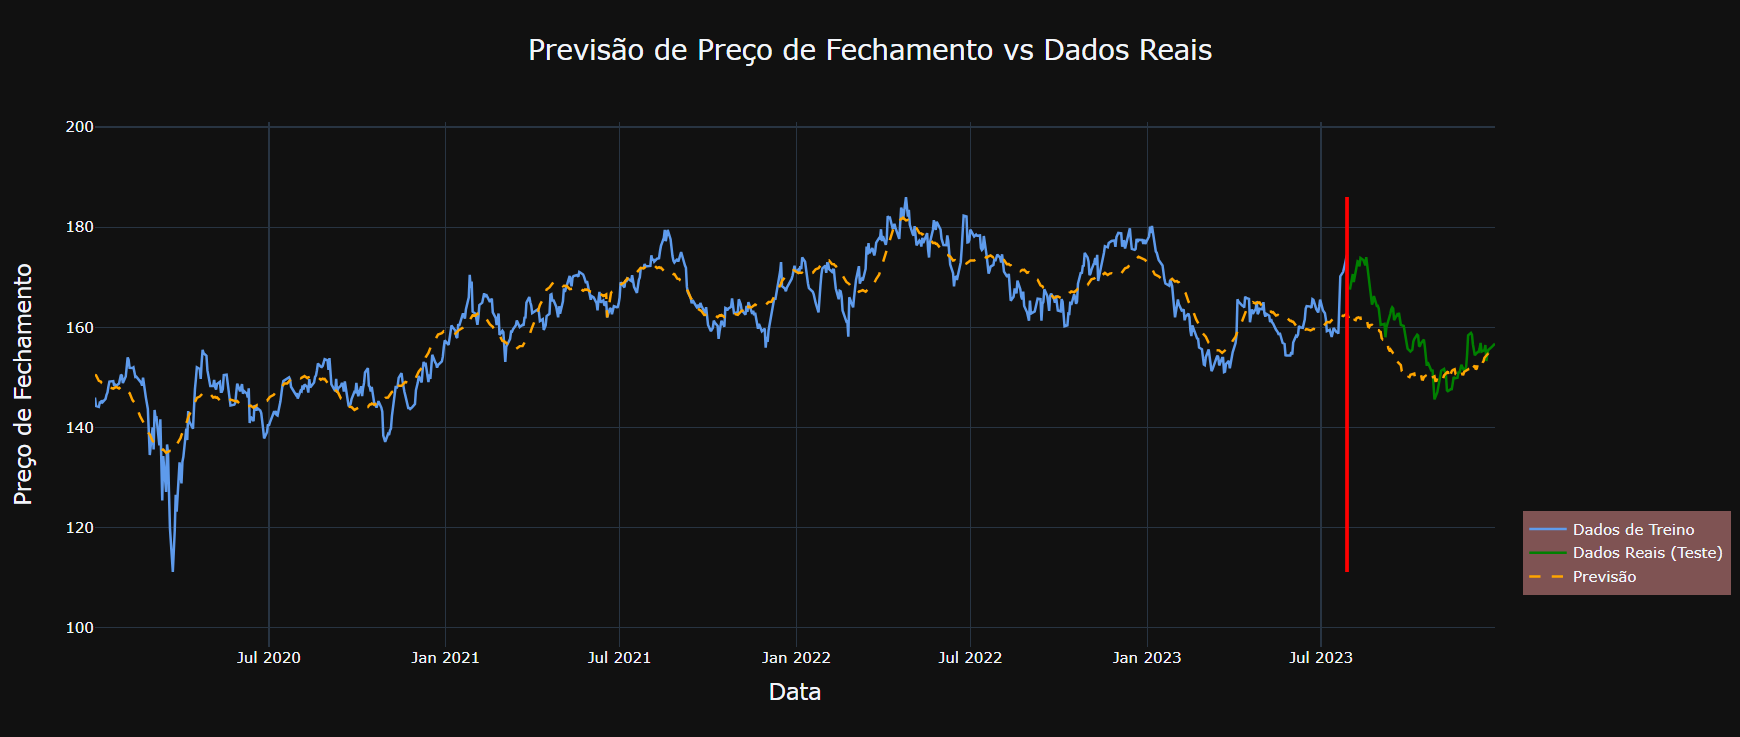